## Deep Learning Dataset 5

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
import pandas as pd
import pandas as np

In [3]:
import os
import scipy.io as sio

In [4]:
import pandas as pd
from scipy.stats import ttest_ind
import numpy as np
#import python libraries
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
 
# The GPU id to use, usually either "0" or "1";
os.environ["CUDA_VISIBLE_DEVICES"]="0"; 
import keras
from sklearn.model_selection import train_test_split
from keras.models import Model, Sequential
from keras.layers import Flatten, Dense, Input, Conv1D, MaxPooling1D, GlobalAveragePooling1D, GlobalMaxPooling1D, AveragePooling1D,BatchNormalization
from keras.engine.topology import get_source_inputs
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras import backend as K
from keras.applications.imagenet_utils import decode_predictions
from keras.applications.imagenet_utils import preprocess_input
from keras_applications.imagenet_utils import _obtain_input_shape
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint
from keras.utils import to_categorical
from keras.models import load_model
from keras.layers import Dropout
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import tensorflow.compat.v1 as tf
s = tf.InteractiveSession()
tf.disable_v2_behavior()
import operator as op
from functools import reduce
from tqdm import tnrange,tqdm_notebook
import operator as op
from functools import reduce
import os
import scipy.io as sio

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
import matplotlib.pyplot as plt

Using TensorFlow backend.


Instructions for updating:
non-resource variables are not supported in the long term


/home/pace/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/pace/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/pace/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/pace/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_

In [5]:
from keras.utils import to_categorical

In [6]:
## Importing required libraries
import numpy as np
import tensorflow.compat.v1 as tf
from sklearn.metrics import roc_auc_score, accuracy_score
s = tf.InteractiveSession()
tf.disable_v2_behavior()

/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [7]:
d_len = 100000
d_file_len = 100000
num_files = 1000

In [8]:
def concatDataTraces(path):
    mats = []
    index = 0 
    fileNames = np.arange(100, (d_len + 100), 100).tolist()
    for r in range(0,num_files):
        mats.append(sio.loadmat(path+"traces_"+ str(fileNames[index]) +".mat", verify_compressed_data_integrity=False))
        index = index + 1
    mats = np.array(mats)
    myArray = []
    
    for i in range(0,num_files):
        for j in range(0,10):
            myArray.append(mats[i]['data'][j])
    return(myArray)

In [9]:
def concatDataTrigger(path):
    mats = []
    index = 0 
    fileNames = np.arange(100, (d_len + 100), 100).tolist()
    for r in range(0,num_files):
        mats.append(sio.loadmat(path+"trigger_"+ str(fileNames[index]) +".mat", verify_compressed_data_integrity=False))
        index = index + 1
    mats = np.array(mats)
    myArray = []
    
    for i in range(0,num_files):
        for j in range(0,10):
            myArray.append(mats[i]['data'][j])
    return(myArray)

### Load Data

In [10]:
df_data1 = pd.read_csv('../DataFactory/FixedPlaintext/TS5_A.csv')

In [11]:
df_data1['label'] = 0

In [12]:
df_data2 = pd.read_csv('../DataFactory/FixedPlaintext/TS5_B.csv')

In [13]:
df_data2['label'] = 1

In [14]:
len(df_data1)

1000000

### Create Label

In [15]:
df_label1 = df_data1['label']
df_data1 = df_data1.drop(['label'],axis=1)

In [16]:
df_label2 = df_data2['label']
df_data2 = df_data2.drop(['label'],axis=1)

In [17]:
df_data = pd.concat([df_data1,df_data2])
df_data = df_data.reset_index()
df_data = df_data.to_numpy()
df_data = np.delete(df_data, 0, axis=1)

In [18]:
len(df_data)

2000000

In [19]:
df_label = pd.concat([df_label1,df_label2])
df_label = df_label.reset_index()
df_label = df_label.to_numpy()

In [20]:
df_label = df_label[:,-1]

### Split Label

In [21]:
X_train, X_test, y_train, y_test = train_test_split(df_data,df_label,test_size=0.2,shuffle=True,stratify=df_label)

In [23]:
y_train = to_categorical(y_train,num_classes=2)

In [24]:
y_test = to_categorical(y_test,num_classes=2)

In [26]:
import numpy as np

In [27]:
X_train = np.array(X_train)

In [28]:
y_train = np.array(y_train)

In [31]:
X_test = np.array(X_test)

In [32]:
y_test = np.array(y_test)

In [33]:
from keras import backend as k

In [100]:
def createMLPModel():
    model = Sequential()
    model.add(Dense(120,input_dim=50, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(90, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(50, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(2, activation='softmax'))
    optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1/100000000, decay=0.0, amsgrad=False)
    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['accuracy'])   
    
    return model

In [108]:
tmpModel = createMLPModel()

In [109]:
trainedModel = tmpModel.fit(x=[X_train[0:100000]],
                            y=y_train[0:100000],
                            batch_size=1000,
                            verbose=1,
                            epochs=30
                            )

Epoch 1/30
100000/100000 [==============================] - 2s 15us/step - loss: 0.2813 - accuracy: 0.5006
Epoch 2/30
100000/100000 [==============================] - 1s 15us/step - loss: 0.2518 - accuracy: 0.5311
Epoch 3/30
100000/100000 [==============================] - 1s 14us/step - loss: 0.2469 - accuracy: 0.5515
Epoch 4/30
100000/100000 [==============================] - 1s 14us/step - loss: 0.2440 - accuracy: 0.5642
Epoch 5/30
100000/100000 [==============================] - 1s 13us/step - loss: 0.2420 - accuracy: 0.5745
Epoch 6/30
100000/100000 [==============================] - 1s 15us/step - loss: 0.2400 - accuracy: 0.5828
Epoch 7/30
100000/100000 [==============================] - 1s 15us/step - loss: 0.2377 - accuracy: 0.5921
Epoch 8/30
100000/100000 [==============================] - 1s 15us/step - loss: 0.2357 - accuracy: 0.6005
Epoch 9/30
100000/100000 [==============================] - 1s 15us/step - loss: 0.2335 - accuracy: 0.6074
Epoch 10/30
100000/100000 [==========

In [110]:
gradient = K.gradients(tmpModel.output[0],tmpModel.input)

In [111]:
iterate = K.function([tmpModel.input], [gradient])

In [170]:
grad = iterate(np.array(X_test[0:1000000],dtype=np.float128))

In [171]:
grad[0][0][0]

array([ 7.8575466e-09, -1.0232071e-09,  7.7087687e-09, -4.2779829e-09,
        1.9078972e-09,  3.5392376e-09, -7.7003770e-10, -6.8505224e-10,
       -5.1683799e-09,  3.7979220e-09, -3.6891992e-09,  2.1538986e-09,
        3.4154435e-09, -1.8345971e-09,  3.4801440e-09,  3.4295347e-09,
        4.9847304e-09,  1.3847870e-09, -5.8559748e-09,  2.5251081e-11,
        6.4012897e-09, -3.5189478e-09, -3.6568302e-09,  1.8203313e-09,
       -2.6621723e-09, -9.6323616e-10, -1.3853730e-09, -8.8208779e-10,
       -3.6858283e-09,  3.3086689e-09, -7.7959781e-09, -4.7326731e-10,
        2.9149312e-09, -5.5633931e-10, -1.5504166e-10, -3.3672243e-09,
       -4.2735806e-09,  3.1848089e-09, -1.5774100e-10, -3.1903837e-09,
        1.8980730e-09,  2.8906550e-09,  2.4892910e-09,  6.7312516e-09,
        2.1192961e-09,  2.1906099e-09, -3.2343557e-09,  3.1050693e-09,
        7.6018214e-09, -4.7250809e-10], dtype=float32)

In [172]:
grad

[[array([[ 7.8575466e-09, -1.0232071e-09,  7.7087687e-09, ...,
           3.1050693e-09,  7.6018214e-09, -4.7250809e-10],
         [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
           0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
         [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
           0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
         ...,
         [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
           0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
         [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
           0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
         [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
           0.0000000e+00,  0.0000000e+00,  0.0000000e+00]], dtype=float32)]]

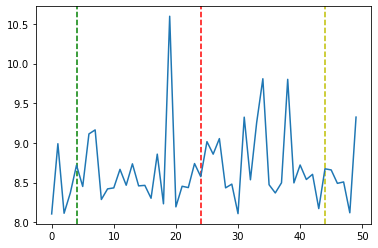

In [173]:
plt.axvline(x=24, color='r', linestyle='--')
plt.axvline(x=4, color='g', linestyle='--')
plt.axvline(x=44, color='y', linestyle='--')
plt.plot(-np.log10(np.abs(grad[0][0][0])))
plt.show()

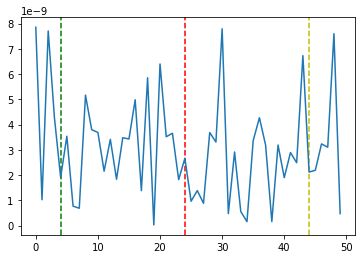

In [174]:
plt.axvline(x=24, color='r', linestyle='--')
plt.axvline(x=4, color='g', linestyle='--')
plt.axvline(x=44, color='y', linestyle='--')
plt.plot(np.abs(grad[0][0][0]))
plt.show()